<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 2</h3>
    <h3>Ejercicio 1</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago<p>
</div>

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess

# **MODELO MA**

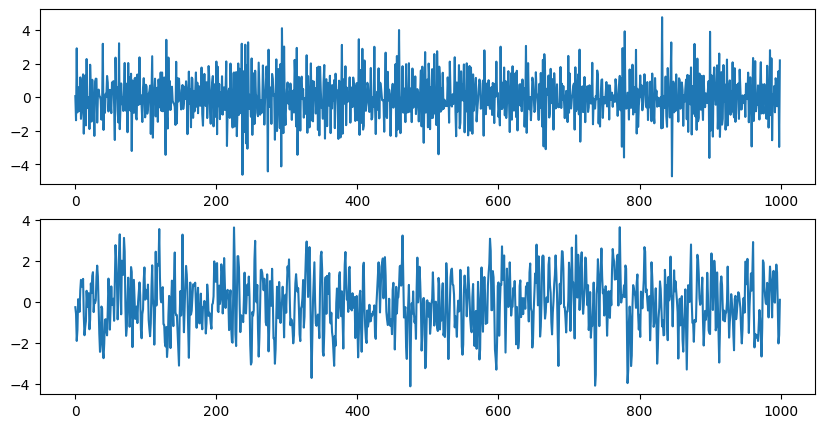

In [ ]:
# Grafico 1: MA parametro: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
datos_simulados_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(datos_simulados_1);

# Grafico 2: MA parametro: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
datos_simulados_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(datos_simulados_2);

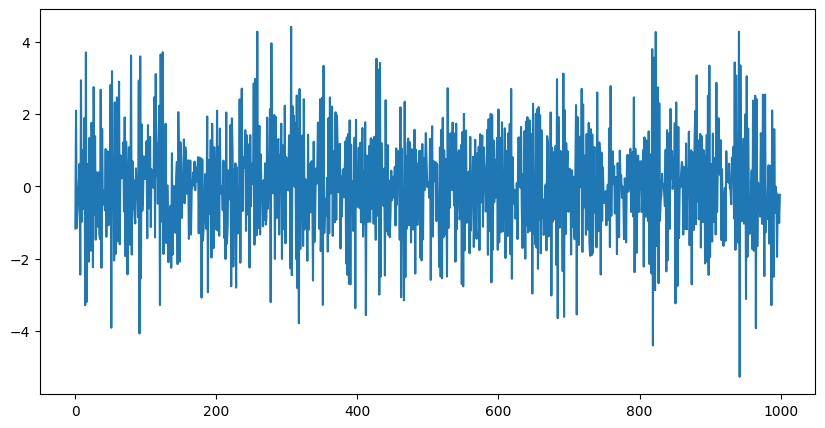

In [ ]:
# Grafico 3: MA parametro: -0.9 y 0.9
ar3 = np.array([1])
ma3 = np.array([1, -0.9, 0.9])
MA_object3 = ArmaProcess(ar3, ma3)
datos_simulados_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(datos_simulados_3);

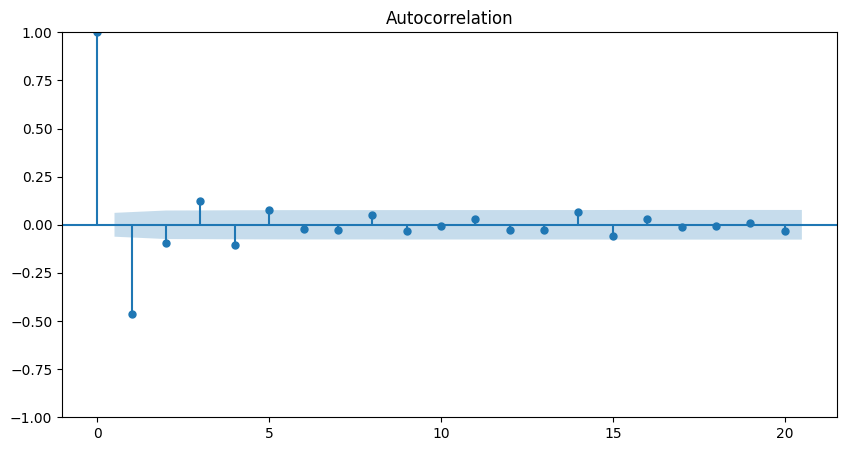

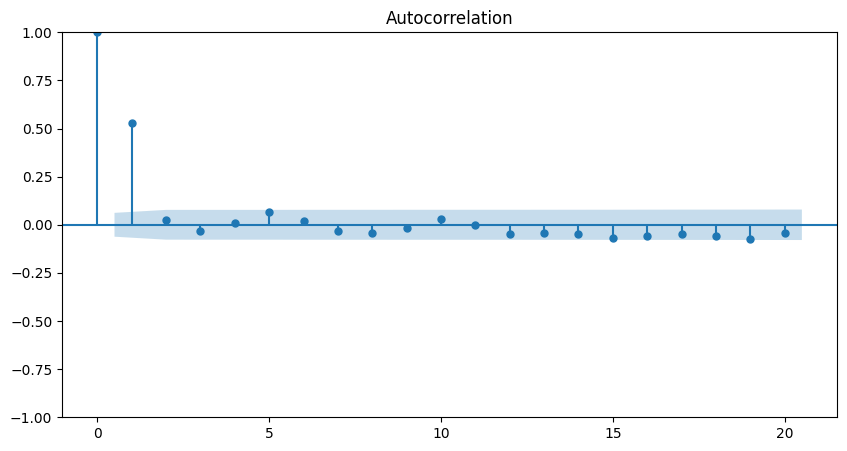

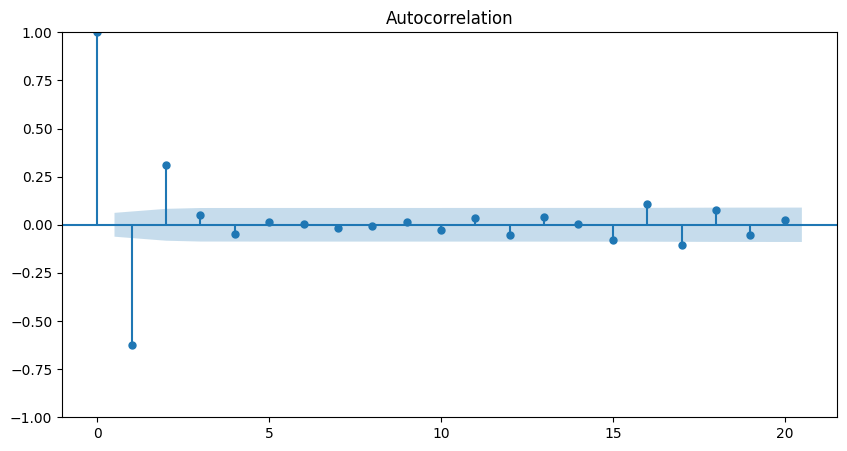

In [ ]:
# grafico ACF de los datos simulados 1:

# Comentario extra, el grafico de la fc de autocorrelacion. Viene con un valor por defecto del nivel de confianza del 95 % ( es decir = 1 - alpha  = 0.95) Agrego el valor por defecto en el codigo

plot_acf(datos_simulados_1, lags=20, alpha = 0.05);


# grafico ACF de los datos simulados 2:
plot_acf(datos_simulados_2, lags=20);

# grafico ACF de los datos simulados 3:
plot_acf(datos_simulados_3, lags=20);

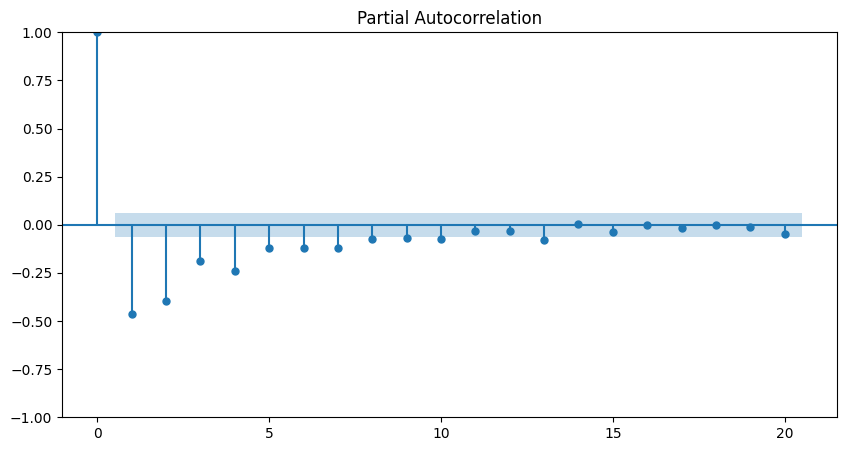

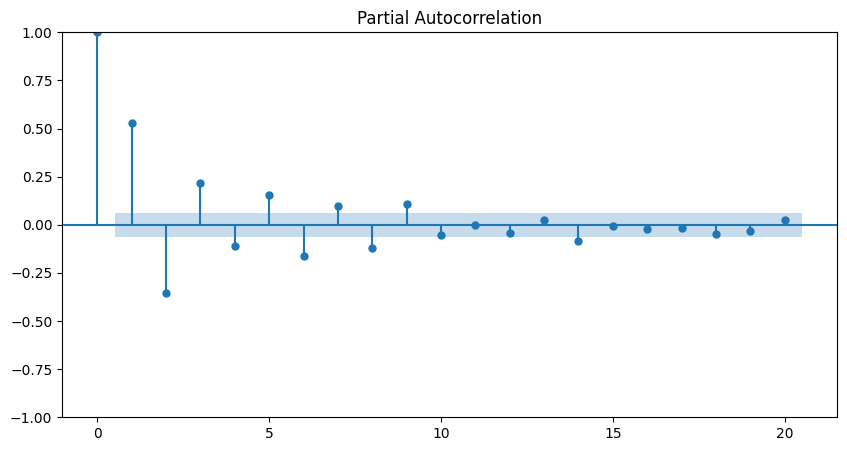

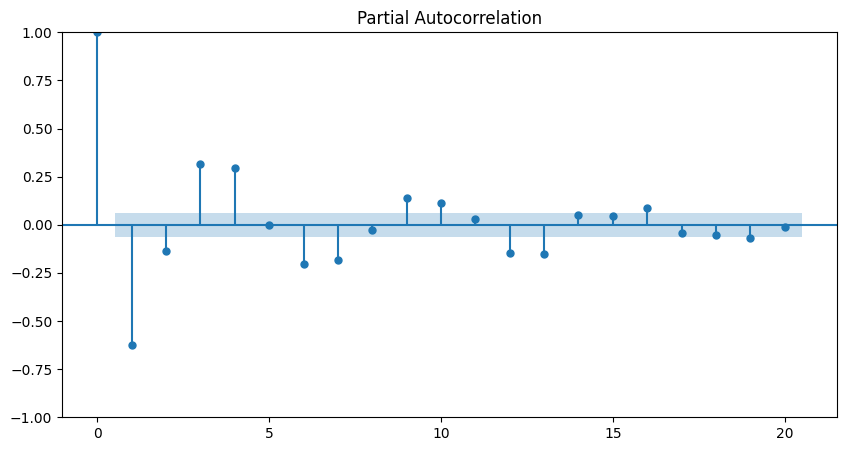

In [ ]:
# grafico PACF de los datos simulados 1:
plot_pacf(datos_simulados_1, lags=20);

# grafico PACF de los datos simulados 2:
plot_pacf(datos_simulados_2, lags=20);

# grafico PACF de los datos simulados 3:
plot_pacf(datos_simulados_3, lags=20);

*Aqui* vemos el modelo MA(1) de los simulados 1:




In [ ]:
modelo1 = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,1))
resultado1 = modelo1.fit()

resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1427.378
Date:                Tue, 01 Oct 2024   AIC                           2860.757
Time:                        23:14:23   BIC                           2875.480
Sample:                             0   HQIC                          2866.353
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.004     -0.161      0.872      -0.008       0.007
ma.L1         -0.8753      0.015    -58.128      0.000      -0.905      -0.846
sigma2         1.0155      0.046     22.048      0.000       0.925       1.106
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.93   Prob(JB):                         0.87
Heteroskedasticity (H):               0.94   Skew:                            -0.03
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA(1) de los simulados 2:

In [ ]:
modelo2 = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,1))
resultado2 = modelo2.fit()

resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1414.285
Date:                Tue, 01 Oct 2024   AIC                           2834.570
Time:                        23:15:01   BIC                           2849.293
Sample:                             0   HQIC                          2840.165
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0316      0.059     -0.538      0.591      -0.147       0.084
ma.L1          0.8674      0.016     55.522      0.000       0.837       0.898
sigma2         0.9893      0.047     21.174      0.000       0.898       1.081
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.20   Prob(JB):                         0.33
Heteroskedasticity (H):               1.08   Skew:                            -0.05
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
modelo3_error_prueba = sm.tsa.arima.ARIMA(datos_simulados_3, order=(0,0,4))
modelo3 = sm.tsa.arima.ARIMA(datos_simulados_3, order=(0,0,2))  # MA(2)
resultado3_error_prueba = modelo3_error_prueba.fit()

resultado3_error_prueba.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -1381.097
Date:                Tue, 01 Oct 2024   AIC                           2774.195
Time:                        23:18:37   BIC                           2803.641
Sample:                             0   HQIC                          2785.386
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.031      0.158      0.874      -0.057       0.066
ma.L1         -0.8538      0.032    -26.477      0.000      -0.917      -0.791
ma.L2          0.8480      0.042     20.199      0.000       0.766       0.930
ma.L3          0.0409      0.042      0.969      0.333      -0.042       0.124
ma.L4         -0.0043      0.031     -0.136      0.892      -0.066       0.057
sigma2         0.9240      0.043     21.740      0.000       0.841       1.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.59
Prob(Q):                              1.00   Prob(JB):                         0.74
Heteroskedasticity (H):               0.94   Skew:                             0.04
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
resultado3 = modelo3.fit()

resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1381.780
Date:                Tue, 01 Oct 2024   AIC                           2771.560
Time:                        23:21:03   BIC                           2791.191
Sample:                             0   HQIC                          2779.021
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0049      0.030      0.162      0.871      -0.055       0.065
ma.L1         -0.8861      0.016    -57.005      0.000      -0.917      -0.856
ma.L2          0.8849      0.015     57.660      0.000       0.855       0.915
sigma2         0.9253      0.043     21.770      0.000       0.842       1.009
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                 0.60
Prob(Q):                              0.31   Prob(JB):                         0.74
Heteroskedasticity (H):               0.93   Skew:                             0.04
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# MODELO ARMA (P,Q)

- ARMA=
    - Autoregressive moving-average (ARMA) model
    - ARMA = AR + MA
        - ARMA(1, 1) model:
$$ y_t = a_1 y_{t-1} + m_1 \epsilon_{t-1} + \epsilon_t $$
        - ARMA(p, q) model:
            - p es el orden del componente AR
            - q es el orden del componente MA

ARMA (2,2)

In [ ]:
alphas = np.array([0.5, -0.25])
betas = np.array([0.5, -0.3])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

In [ ]:
ARMA_2 = ArmaProcess(ar, ma).generate_sample(nsample=1000)


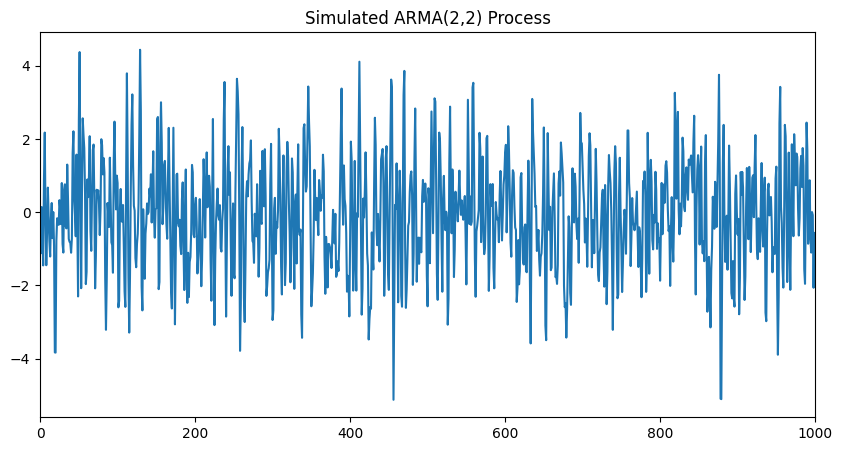

In [ ]:
plt.plot(ARMA_2)
plt.title("Simulated ARMA(2,2) Process")
plt.xlim([0, 1000])
plt.show()

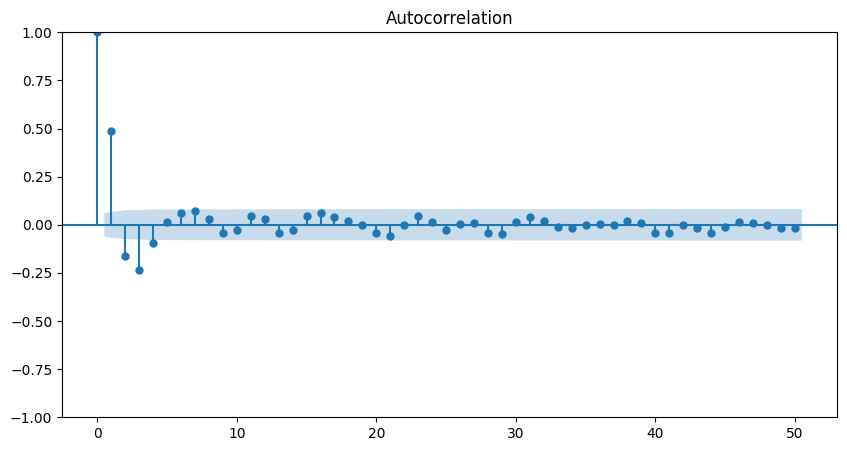

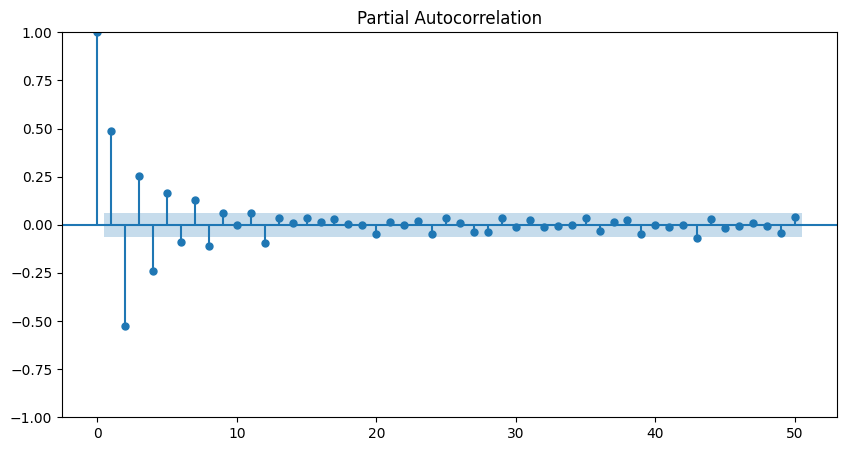

In [ ]:
plot_acf(ARMA_2, lags=50);
plot_pacf(ARMA_2, lags=50);

In [ ]:
modeloARMA = sm.tsa.arima.ARIMA(ARMA_2, order=(5,0,8))
resultadoARMA = modeloARMA.fit()

resultadoARMA.summary()

# ARMA (2,2)   CRITERIO DE INFORMACION DE AIC = 2833.379  --->>> MAS CHICO ,ES EL QUE TOMAMOS
# ARMA ( 5,8)    CRITERIO DE INFORMACION DE AIC = 2837.360

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(5, 0, 8)   Log Likelihood               -1403.680
Date:                Tue, 01 Oct 2024   AIC                           2837.360
Time:                        23:26:29   BIC                           2910.976
Sample:                             0   HQIC                          2865.339
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0732      0.055     -1.324      0.186      -0.182       0.035
ar.L1          1.3352      0.642      2.081      0.037       0.078       2.593
ar.L2         -1.7753      0.570     -3.114      0.002      -2.893      -0.658
ar.L3          1.6762      0.865      1.938      0.053      -0.019       3.371
ar.L4         -0.9004      0.580     -1.551      0.121      -2.038       0.237
ar.L5          0.3928      0.328      1.198      0.231      -0.250       1.036
ma.L1         -0.2952      0.644     -0.458      0.647      -1.557       0.967
ma.L2          0.3720      0.207      1.800      0.072      -0.033       0.777
ma.L3         -0.1223      0.338     -0.362      0.718      -0.785       0.541
ma.L4         -0.6322      0.237     -2.673      0.008      -1.096      -0.169
ma.L5          0.2462      0.287      0.858      0.391      -0.316       0.808
ma.L6         -0.1498      0.188     -0.798      0.425      -0.518       0.218
ma.L7          0.0135      0.076      0.177      0.859      -0.136       0.163
ma.L8          0.0438      0.068      0.647      0.517      -0.089       0.176
sigma2         0.9672      0.043     22.624      0.000       0.883       1.051
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.97   Prob(JB):                         0.68
Heteroskedasticity (H):               1.01   Skew:                            -0.04
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(ARMA_2, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2833.379, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3621.621, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3352.087, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2902.812, Time=1.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3622.565, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2902.850, Time=2.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2838.684, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2835.370, Time=1.49 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2835.368, Time=0.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2887.319, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2840.850, Time=0.65 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2834.509, Time=0.53 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2837.356, Time=0.91 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2833.792, Time=0.30 sec

Best model:  ARIMA(2,0,2)(0,0,0)

In [ ]:
modeloARMA_v2 = sm.tsa.arima.ARIMA(ARMA_2, order=(2,0,2))
resultadoARMA_v2 = modeloARMA_v2.fit()

resultadoARMA_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1410.689
Date:                Tue, 01 Oct 2024   AIC                           2833.379
Time:                        23:32:02   BIC                           2862.825
Sample:                             0   HQIC                          2844.570
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0777      0.050     -1.555      0.120      -0.176       0.020
ar.L1          0.5641      0.112      5.046      0.000       0.345       0.783
ar.L2         -0.2954      0.031     -9.463      0.000      -0.357      -0.234
ma.L1          0.4771      0.117      4.066      0.000       0.247       0.707
ma.L2         -0.3159      0.108     -2.934      0.003      -0.527      -0.105
sigma2         0.9817      0.043     23.032      0.000       0.898       1.065
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.99   Prob(JB):                         0.53
Heteroskedasticity (H):               1.04   Skew:                            -0.06
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# A fines informativos, veo cual es el intercepto (constante) del modelo
intercepto = resultadoARMA_v2.params[0]
print("Intercepto:", intercepto)

Intercepto: -0.07773531035788249


In [ ]:
# modeloARMA_v2 = sm.tsa.arima.ARIMA(ARMA_2, order=(2,0,2))

modeloARMA_v3 = sm.tsa.arima.ARIMA(ARMA_2, order=(2,0,2), trend='n')
resultadoARMA_v3 = modeloARMA_v3.fit()

resultadoARMA_v3.summary()

'''
coef	std err	z	P>|z|	[0.025	0.975]
const	-0.0777	0.050	-1.555	0.120	-0.176	0.020
'''

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1411.896
Date:                Tue, 01 Oct 2024   AIC                           2833.792
Time:                        23:35:37   BIC                           2858.331
Sample:                             0   HQIC                          2843.119
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5554      0.114      4.880      0.000       0.332       0.778
ar.L2         -0.2933      0.031     -9.391      0.000      -0.354      -0.232
ma.L1          0.4884      0.120      4.087      0.000       0.254       0.723
ma.L2         -0.3058      0.110     -2.790      0.005      -0.521      -0.091
sigma2         0.9841      0.043     23.115      0.000       0.901       1.068
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.30
Prob(Q):                              0.94   Prob(JB):                         0.52
Heteroskedasticity (H):               1.04   Skew:                            -0.06
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

💻 Fin del codigo.